# CAPSTONE PROJECT-3 :PRCP - 1027 - Skin Diseases Classification

## Problem Statement 

**Task 1:** Prepare a complete data analysis report on the given data.

**Task 2:** Create a predictive model using machine learning techniques to predict the various classes of skin disease. 

**Task 3:** Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


## Dataset Information
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. 

The diseases in this group are **psoriasis(1)**, **seboreic dermatitis(2)**, **lichen planus(3)**, **pityriasis rosea(4)**, **cronic dermatitis(5)**, and **pityriasis rubra pilaris(6)**. 

(**_Histopathology_**:The study of diseased cells and tissues using a microscope.)

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. 

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. **Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.**

The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. 

The age feature simply represents the age of the patient. 

Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

The names and id numbers of the patients were recently removed from the database.

## Importing Required Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams

# for warnings
import warnings
warnings.filterwarnings('ignore')


## Reading the File

In [2]:
df=pd.read_csv("dataset_dermatology.csv")

## Basic Checks

In [3]:
pd.set_option("display.max_columns", None)
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

In [4]:
df.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
361                                 0           1           1               0   
362                                 0           2           2               0   
363                                 0           3           3               0   
364                                 0           3           2               0   
365                                 0           0           2               0   

     parakeratosis  clubbing_of_the_rete_ridges  \
361              0                            0   
362              0                            0   
363              0                            0   
364              0                            0   
365              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
361                              0                                         0   
362                              0                                         0   
363                              0                                         0   
364                              0                                         0   
365                              2                                         3   

     spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
361                   0                  0                      0   
362                   0                  0                      0   
363                   0                  0                      3   
364                   0                  0                      3   
365                   0                  2                      0   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   


In [5]:
print(df.shape)
df.info()

(366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                          

## Attribute Information: 

### Clinical Attributes:
1. **Erythema** - A skin reaction that can be triggered by an infection or some medicines.
2. **Scaling** - The loss of the outer layer of the epidermis in large, scale-like flakes
3. **Definite Borders** - Border description of skin lesions, i.e, areas of  skin that are different from the skin around them.
4. **itching** - Of, relating to, or characterized by an irritating sensation of the skin.
5. **Koebner Phenomenon** -  Also called the Koebner response or the isomorphic response,  is the appearance of skin lesions on lines of trauma.(Source - Wikipedia)
6. **Polygonal Papules** - A papule is a small, well-defined bump in the skin. It may have a rounded, pointed or flat top.
7. **Follicular Papules** - Individual papules that include a central hair follicle. (Source -USA National Centre of Biotechnology Information)

8. **Oral mucosal involvement** -Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. (Source -USA National Centre of Biotechnology Information)

9. **Knee and elbow involvement** - Skin complexities on knee and elbow
10. **Scalp involvement** - Skin complexities on scalp
11. **Family history, (0 or 1)** - If any of these diseases has been observed in the family.
12. **Age**

### Histopathological Attributes:

1. **Melanin_incontinence** - Pigmentary incontinence, which is a phenomenon observed in some inflammatory skin disorders. Clinically it may be seen as a slate-colored pigmentation. Histologically it is seen as an accumulation of melanin in the upper dermis (Source -USA National Centre of Biotechnology Information).
2. **Eosinophils in the infiltrate** - Eosinophils are a kind of white blood cell that helps fight disease. Eosinophil infiltration is a common finding in a broad spectrum of skin diseases, despite the fact that the skin is devoid of eosinophils under physiologic conditions.(Source -USA National Centre of Biotechnology Information).
3. **PNL infiltrate** - Pure Neuritic Leprosy(PNL) Infiltrate.
4. **Fibrosis of the papillary dermis** - Overgrowth, hardening, and/or scarring of various tissues and  excess deposition of extracellular matrix components including collagen in the thin top layer of the dermis (the inner layer of the skin), i.e, papillary dermis.(Source -USA National Centre of Biotechnology Information).
5. **Exocytosis** -  Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells. Pathological changes may arise in epidermis, dermis and/or subcutaneous tissue (tissues under the skin).
6. **Acanthosis** - A skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. 
7. **Hyperkeratosis** - The increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles.
8. **Parakeratosis** - Incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis.
9. **Clubbing of the rete ridges** - Rete ridges are the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
10. **Elongation of the rete ridges** - Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis.
11. **Thinning_of_the_suprapapillary_epidermis** -  A thinning of the granular layer at the tips of the papillae.
12. **Spongiform_pustule** - Pustular psoriasis which is microscopically manifested as characteristic spongiform pustule.
13. **Munro_microabcess** - One of the characteristic histological features of early psoriasis vulgaris
14. **Focal_hypergranulosis** An increased thickness of the stratum granulosum.
15. **Disappearance_of_the_granular_layer** - Degeneration of granular layer in Cerebellum.
16. **Vacuolisation_and_damage_of_basal_layer** - presence of vacuolisation and damage of skin basal layer.
17. **Spongiosis** - presence of intercellular edema
18. **Saw-tooth_appearance_of_retes** - appearance of saw tooth patterns under the skin tissue.
19. **Follicular_horn_plug** - presence of follicular horn plugs
20. **Perifollicular_parakeratosis** -  keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
21. **Inflammatory_monoluclear_inflitrate** - increase in the number of infiltrating mononuclear cells in the skin.
22. **Band-like_infiltrate** - basal epidermis in a banded pattern.

### Class of Diseases
The diseases in this group are

1. **Psoriasis(1)**,
2. **Seboreic Dermatitis(2)**,
3. **Lichen Planus(3)**,
4. **Pityriasis Rosea(4)**,
5. **Cronic Dermatitis(5)**,
6. **Pityriasis Rubra Pilaris(6)**.

In [6]:
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

In [7]:
df.describe(include='O')

Age
count   366
unique   61
top      40
freq     17

## Data Manilupation and Cleaning

In [8]:
for column in df.columns:
    df[column]=pd.to_numeric(df[column], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [10]:
df['family_history'].replace([0,1], ["Not Observed", "Observed"], inplace=True)

In [11]:
df['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea','Cronic_Dermatitis','Pityriasis_rubra_pilaris'], inplace=True)

In [12]:
df['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

In [13]:
# Replace using median 
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)
df['Age'] = df['Age'].replace(0,df['Age'].median())

In [14]:
df['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., 35., 15.,
       46., 62., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13., 27.,
       31., 28., 64., 39., 47., 16.,  7., 70., 37., 61., 67., 56., 53.,
       24., 58., 49., 63., 68.,  9., 75.])

In [15]:
df_eda = df.copy()

In [16]:
df_eda.drop(columns=['Age'])

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement family_history  \
0                             1                  0   Not Observed   
1                             1                  1       Observed   
2                             0                  0   Not Observed   
3                             3                  2   Not Observed   
4                             0                  0   Not Observed   
..                          ...                ...            ...   
361                           0                  0   Not Observed   
362                           0                  0   Not Observed   
363                           0                  0   Not Observed   
364                           0                  0   Not Observed   
365                           3                  3   Not Observed   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                                .

In [17]:
for col in df_eda.drop(columns=['Age']).columns:
    df_eda[col] = df_eda[col].astype('category',copy=False)

In [18]:
df_eda.head()

erythema scaling definite_borders itching koebner_phenomenon  \
0        2       2                0       3                  0   
1        3       3                3       2                  1   
2        2       1                2       3                  1   
3        2       2                2       0                  0   
4        2       3                2       2                  2   

  polygonal_papules follicular_papules oral_mucosal_involvement  \
0                 0                  0                        0   
1                 0                  0                        0   
2                 3                  0                        3   
3                 0                  0                        0   
4                 2                  0                        2   

  knee_and_elbow_involvement scalp_involvement family_history  \
0                          1                 0   Not Observed   
1                          1                 1       Observed   
2                          0                 0   Not Observed   
3                          3                 2   Not Observed   
4                          0                 0   Not Observed   

  melanin_incontinence eosinophils_in_the_infiltrate PNL_infiltrate  \
0                    0                             0              0   
1                    0                             0              1   
2                    1                             0              0   
3                    0                             0              3   
4                    1                             0              0   

  fibrosis_of_the_papillary_dermis exocytosis acanthosis hyperkeratosis  \
0                                0          3          2              0   
1                                0          1          2              0   
2                                0          1          2              0   
3                                0          0          2              0   
4                                0          1          2              0   

  parakeratosis clubbing_of_the_rete_ridges elongation_of_the_rete_ridges  \
0             0                           0                             0   
1             2                           2                             2   
2             2                           0                             0   
3             3                           2                             2   
4             0                           0                             0   

  thinning_of_the_suprapapillary_epidermis spongiform_pustule  \
0                                        0                  0   
1                                        2                  2   
2                                        0                  0   
3                                        2                  2   
4                                        0                  0   

  munro_microabcess focal_hypergranulosis disappearance_of_the_granular_layer  \
0                 0                     0                                   0   
1                 1                     0                                   0   
2                 0                     2                                   0   
3                 0                     0                                   3   
4                 0                     2                                   2   

  vacuolisation_and_damage_of_basal_layer spongiosis  \
0                                       0          3   
1                                       0          0   
2                                       2          3   
3                                       0          0   
4                                       3          2   

  saw-tooth_appearance_of_retes follicular_horn_plug  \
0                             0                    0   
1                             0                    0   
2                             2                    0   
3                             0

In [19]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   erythema                                  366 non-null    category
 1   scaling                                   366 non-null    category
 2   definite_borders                          366 non-null    category
 3   itching                                   366 non-null    category
 4   koebner_phenomenon                        366 non-null    category
 5   polygonal_papules                         366 non-null    category
 6   follicular_papules                        366 non-null    category
 7   oral_mucosal_involvement                  366 non-null    category
 8   knee_and_elbow_involvement                366 non-null    category
 9   scalp_involvement                         366 non-null    category
 10  family_history            

# Exploratory Data Analysis

As per the information provided, Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. 

- **Clinical Features:** Erythema, Scaling, Definite_borders, Itching, Koebner_phenomenon, Polygonal_papules, Follicular_papules, Oral_mucosal_involvement, Knee_and_elbow_involvement, Scalp_involvement, Family_history, and Age. 

- **Histopathological features:** Melanin_incontinence, Eosinophils_in_the_infiltrate, PNL_infiltrate, Fibrosis_of_the_papillary_dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing_of_the_rete_ridges, Elongation_of_the_rete_ridges, Thinning_of_the_suprapapillary_epidermis, Spongiform_pustule, Munro_microabcess, Focal_hypergranulosis, Disappearance_of_the_granular_layer, Vacuolisation_and_damage_of_basal_layer, Spongiosis, Saw-tooth_appearance_of_retes, Follicular_horn_plug, Perifollicular_parakeratosis, Inflammatory_monoluclear_inflitrate, Band-like_infiltrate.

## Count and Distribution of Clinical Features

In [20]:
clinical_features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

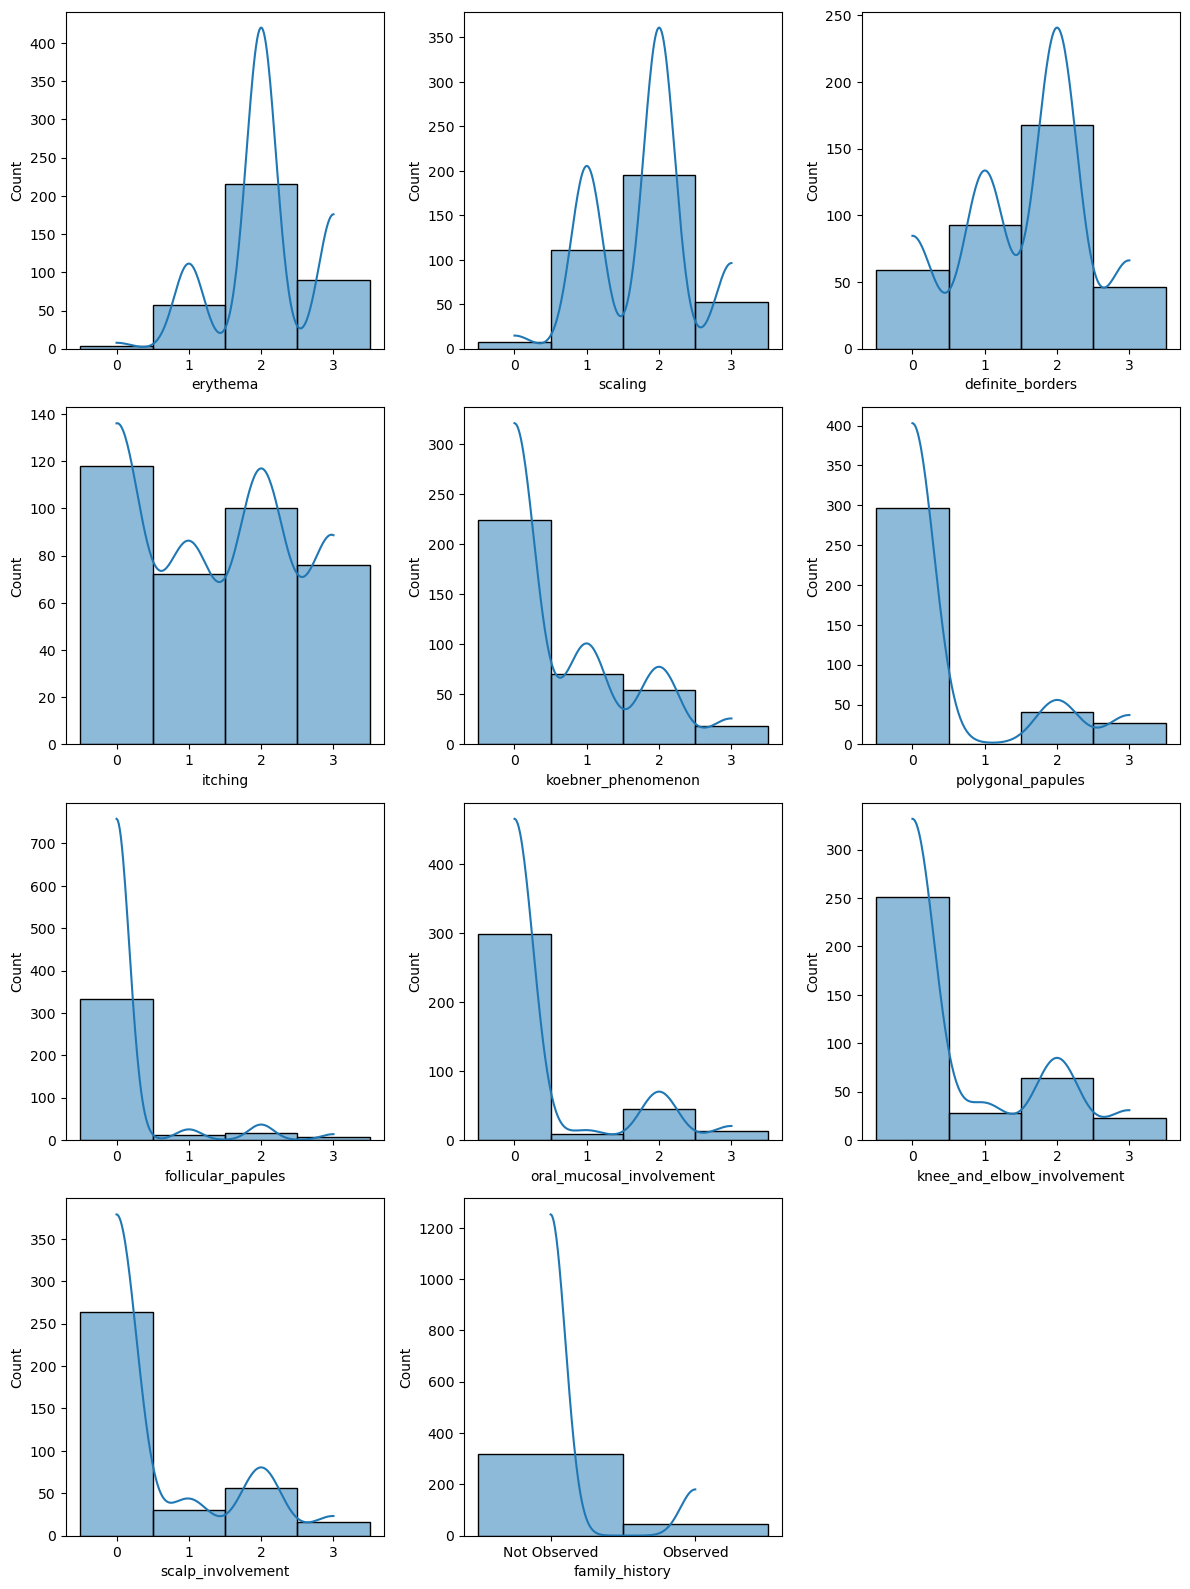

In [21]:
fig=plt.figure(figsize=(12,16))
for i, col in enumerate(clinical_features):
    ax=fig.add_subplot(4,3, i+1)
    sns.histplot(x=df_eda[col], ax=ax, kde=True)
plt.tight_layout()    
plt.show()

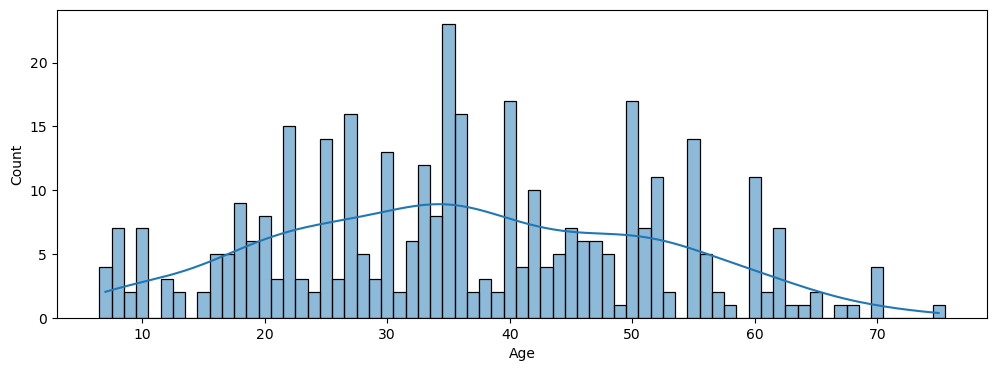

In [22]:
plt.figure(figsize=(12,4))
sns.histplot(x=df_eda['Age'],kde=True, discrete=True)
plt.show()

## Count and Distribution of Histopathological Features

In [23]:
histopath_features = ['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

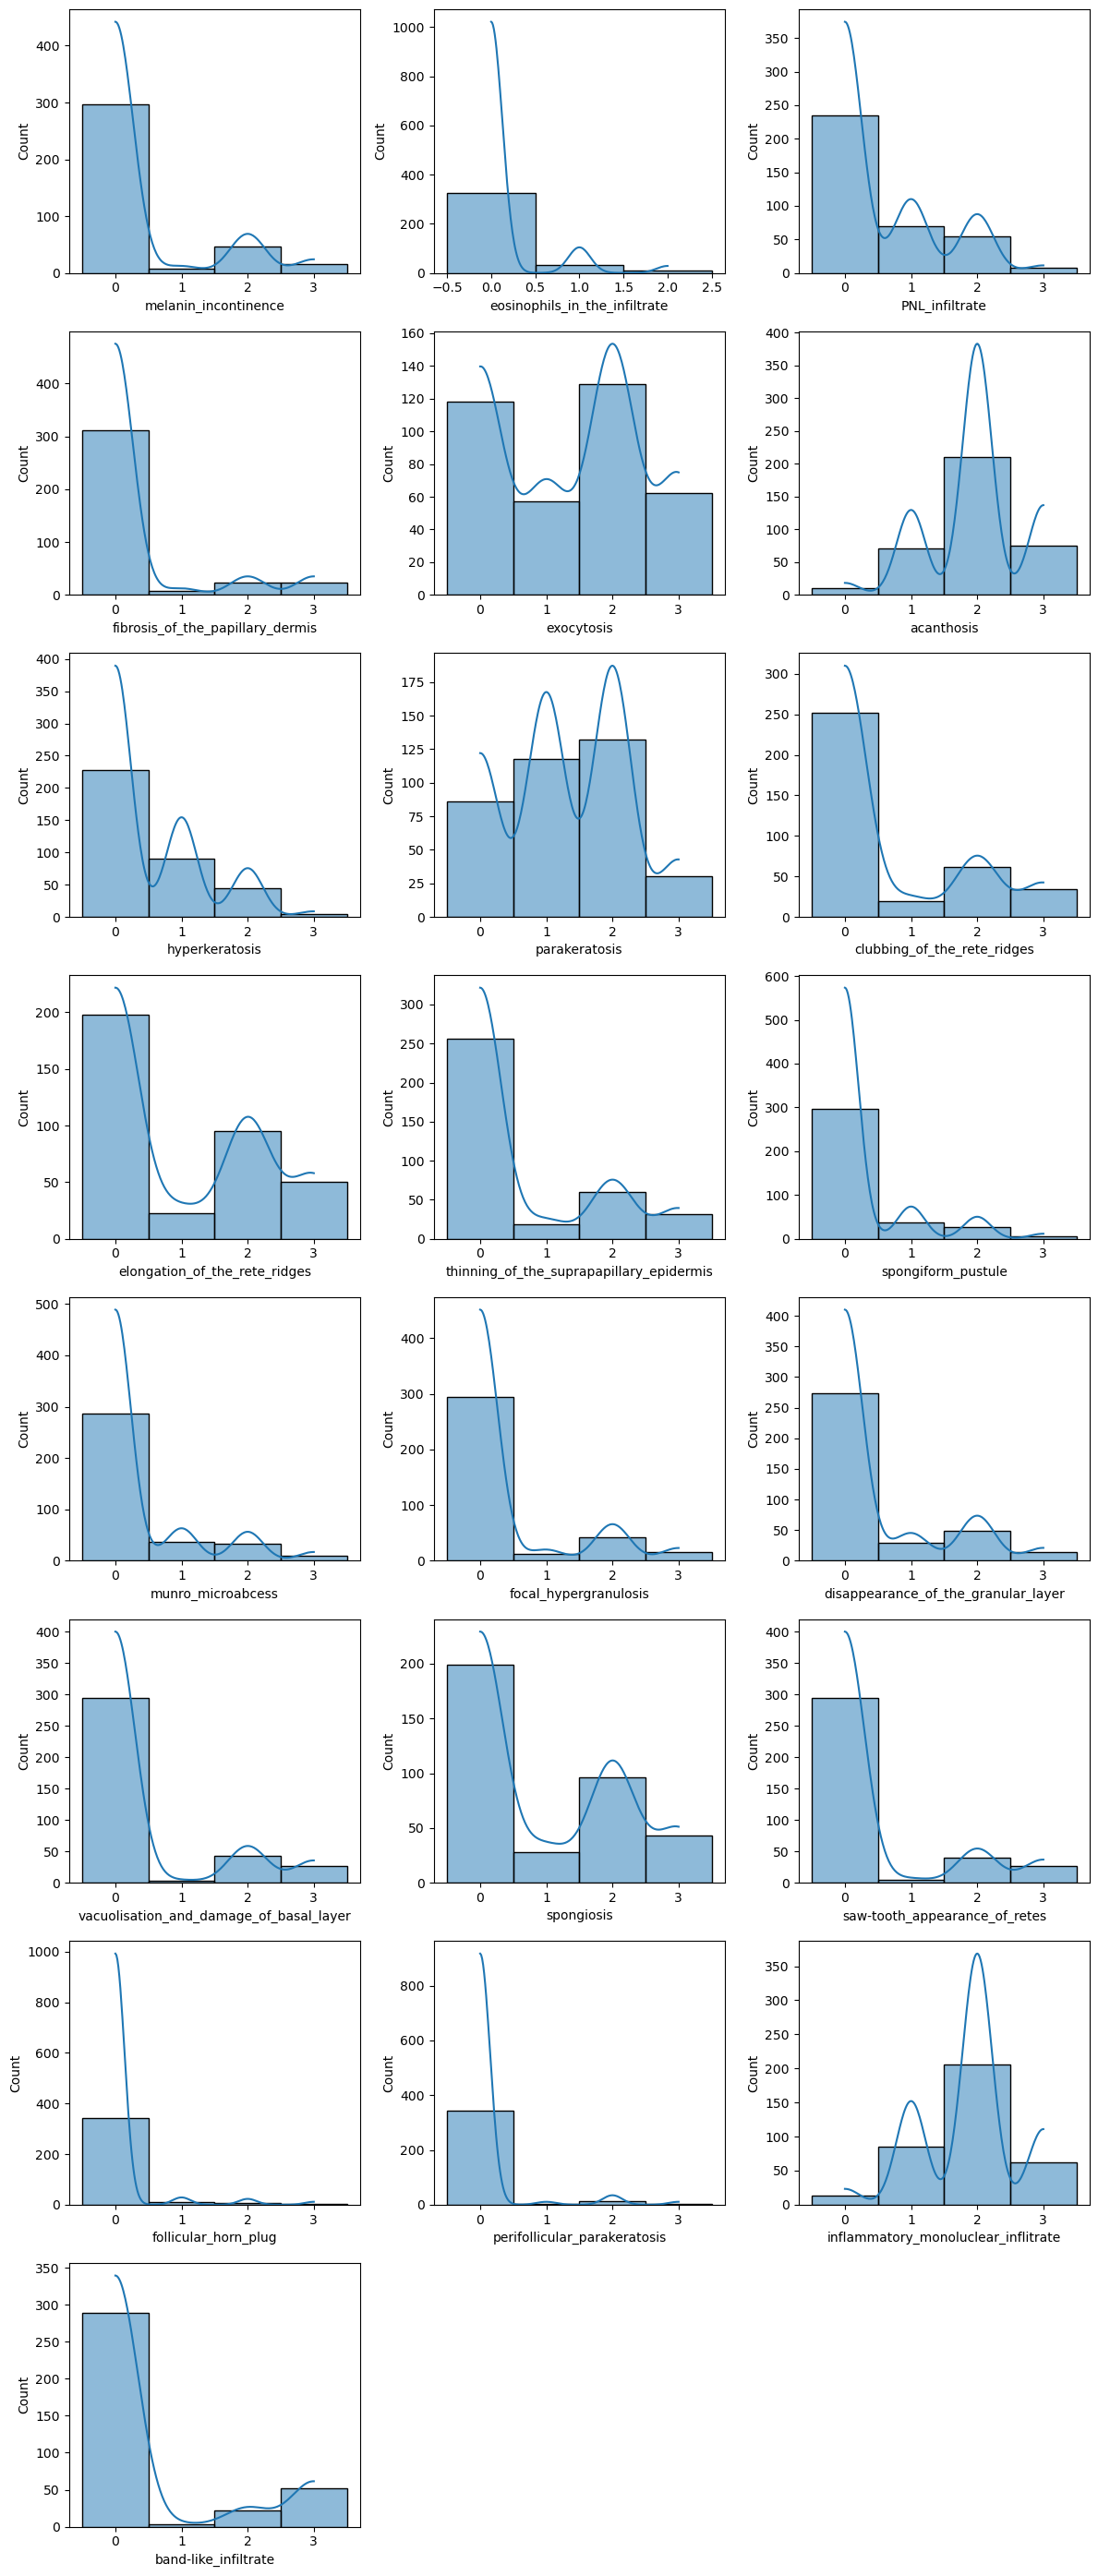

In [24]:
fig=plt.figure(figsize=(12,28))
for i, col in enumerate(histopath_features):
    ax=fig.add_subplot(8,3, i+1)
    sns.histplot(x=df_eda[col], ax=ax, kde=True)
plt.tight_layout()    
plt.show()

## Distribution and Count of Classes of Skin Disorders

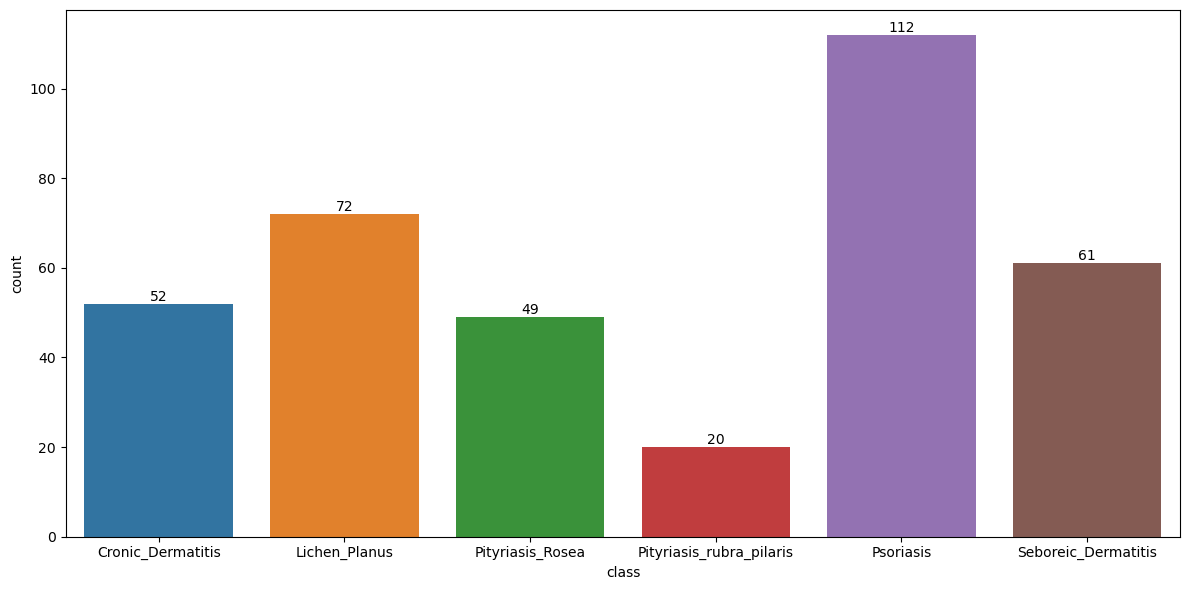

In [25]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df_eda['class'])
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

<AxesSubplot:ylabel='class'>

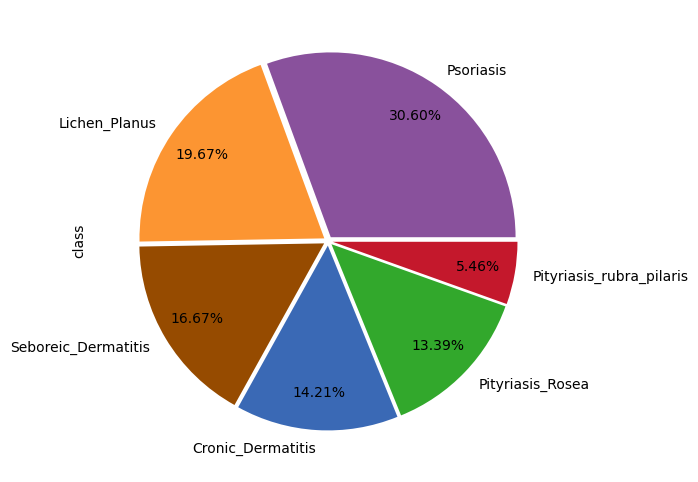

In [26]:
plt.figure(figsize=(16,6))
df_eda['class'].value_counts().plot(kind='pie', autopct='%0.02f%%', radius=1.0, pctdistance=0.8, 
                                    colors= ['#89519c','#FC9532','#964B00','#3a69b5', '#32a82c','#c4182c'],
                                    explode = [0.025, 0.025, 0.025, 0.025, 0.025, 0.025])

In [27]:
df_eda['class'].value_counts()

Psoriasis                   112
Lichen_Planus                72
Seboreic_Dermatitis          61
Cronic_Dermatitis            52
Pityriasis_Rosea             49
Pityriasis_rubra_pilaris     20
Name: class, dtype: int64

## Age wise Distribution of classes of Skin diseases.

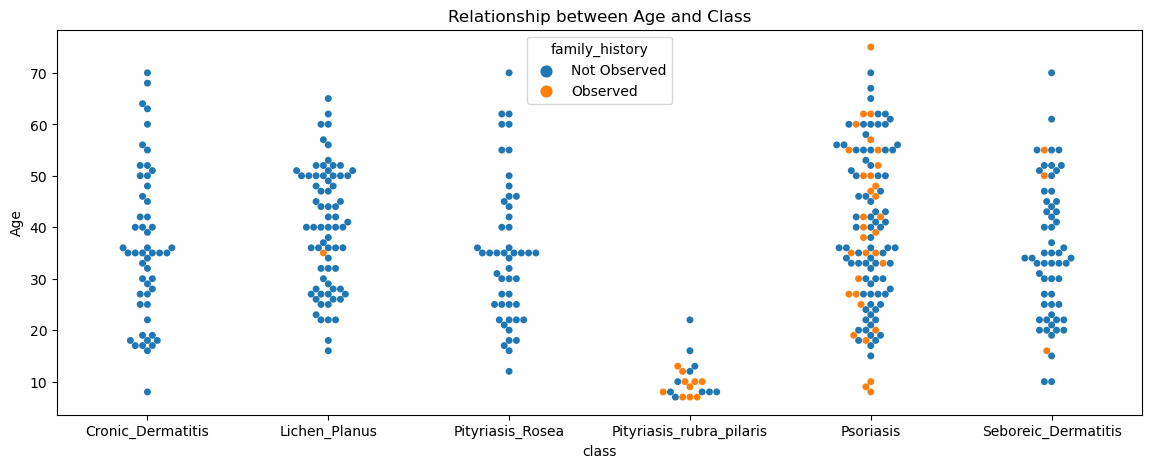

In [28]:
plt.figure(figsize=(14,5))
sns.swarmplot(y="Age", x="class", data=df_eda, hue='family_history')
plt.title('Relationship between Age and Class')
plt.show()

**OBSERVATIONS:**
- Pityriasis_Rubra_Pilaris is only found ages below 20. This disease show high relation with family_history. It was observed in family_history of almost half of the patients.
- Except Pityriasis_Rubra_Pilaris, remaining class of diseases are found in almost all the ages. 
- Psoriasis is also significantly related to the family history.

# Data Preprocessing


### Checking For Missing Values

In [29]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**There are no missing values in data**

### Checking Unique Values

In [30]:
# Checking for Unique labels in each feature.

print("UNIQUE VALUES IN EACH FEATURE: ")
print("==============================")
for col in df.columns:
    print(col ,":", df[col].unique(), "with", len(df[col].unique()), "labels")
    print("--------------------------------------------------------------------------------")

UNIQUE VALUES IN EACH FEATURE: 
erythema : [2 3 1 0] with 4 labels
--------------------------------------------------------------------------------
scaling : [2 3 1 0] with 4 labels
--------------------------------------------------------------------------------
definite_borders : [0 3 2 1] with 4 labels
--------------------------------------------------------------------------------
itching : [3 2 0 1] with 4 labels
--------------------------------------------------------------------------------
koebner_phenomenon : [0 1 2 3] with 4 labels
--------------------------------------------------------------------------------
polygonal_papules : [0 3 2 1] with 4 labels
--------------------------------------------------------------------------------
follicular_papules : [0 3 1 2] with 4 labels
--------------------------------------------------------------------------------
oral_mucosal_involvement : [0 3 2 1] with 4 labels
----------------------------------------------------------------------

**There are no unusual values in features**

### One Hot Encoding Family_History

In [31]:
df= pd.get_dummies(df, columns=['family_history'])

In [32]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class', 'family_history_Not Observed',
       'family_history_Observed'],
      dtype='obje

# Model Building

### Declare Feature Vector and Target Variable

In [33]:
X=df.drop(columns=["class"])
y=df['class']

In [34]:
X.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  melanin_incontinence  \
0                           1                  0                     0   
1                           1                  1                     0   
2                           0                  0                     1   
3                           3                  2                     0   
4                           0                  0                     1   

   eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                              0               0   
1                              0               1   
2                              0               0   
3                              0               3   
4                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0     

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  melanin_incontinence                  

In [36]:
y.head()

0    Seboreic_Dermatitis
1              Psoriasis
2          Lichen_Planus
3              Psoriasis
4          Lichen_Planus
Name: class, dtype: object

### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [38]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
X

erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0    0.666667  0.666667          0.000000  1.000000            0.000000   
1    1.000000  1.000000          1.000000  0.666667            0.333333   
2    0.666667  0.333333          0.666667  1.000000            0.333333   
3    0.666667  0.666667          0.666667  0.000000            0.000000   
4    0.666667  1.000000          0.666667  0.666667            0.666667   
..        ...       ...               ...       ...                 ...   
361  0.666667  0.333333          0.333333  0.000000            0.333333   
362  1.000000  0.666667          0.333333  0.000000            0.333333   
363  1.000000  0.666667          0.666667  0.666667            1.000000   
364  0.666667  0.333333          1.000000  0.333333            0.666667   
365  1.000000  0.666667          0.666667  0.000000            0.000000   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0             0.000000                 0.0                  0.000000   
1             0.000000                 0.0                  0.000000   
2             1.000000                 0.0                  1.000000   
3             0.000000                 0.0                  0.000000   
4             0.666667                 0.0                  0.666667   
..                 ...                 ...                       ...   
361           0.000000                 0.0                  0.000000   
362           0.000000                 0.0                  0.000000   
363           0.666667                 0.0                  0.666667   
364           1.000000                 0.0                  0.666667   
365           0.000000                 0.0                  0.000000   

     knee_and_elbow_involvement  scalp_involvement  melanin_incontinence  \
0                      0.333333           0.000000              0.000000   
1                      0.333333           0.333333              0.000000   
2                      0.000000           0.000000              0.333333   
3                      1.000000           0.666667              0.000000   
4                      0.000000           0.000000              0.333333   
..                          ...                ...                   ...   
361                    0.000000           0.000000              0.000000   
362                    0.000000           0.000000              0.000000   
363                    0.000000           0.000000              0.666667   
364                    0.000000           0.000000              0.666667   
365                    1.000000           1.000000              0.000000   

     eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                              0.0        0.000000   
1                              0.0        0.333333   
2                              0.0        0.000000   
3                              0.0        1.000000   
4                              0.0        0.000000   
..                             ...             ...   
361                            0.0        0.333333   
362                            0.0        0.000000   
363                            1.0        0.000000   
364                            0.0        0.000000   
365                            0.0        0.333333   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0.0    1.000000    0.666667             0.0   
1                                 0.0    0.333333    0.666667             0.0   
2                                 0.0    0.333333    0.666667             0.0   
3                                 0.0    0.000000    0.666667             0.0   
4                                 0.0    0.333333    0.666667             0.0   
..                                ...         ...         ...             ...   
361                               0.0    0.333333    0.333333             0.0   
362                          

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Balancing the Classes of Target Variables

**This is a classification problems having multiple classes with imbalanced dataset.**
This needs to be handled by balancing the classes using Oversampling or Undersampling Techniques. In some cases, the combination of both oversampling and undersampling techniques can be used. 
In this case, the combination of `Synthetic Minority Oversampling Technique(SMOTE)` and `Edited Nearest Neighbors(ENN)` is used.

In [41]:
y_train.value_counts()

Psoriasis                   72
Lichen_Planus               53
Seboreic_Dermatitis         45
Cronic_Dermatitis           36
Pityriasis_Rosea            34
Pityriasis_rubra_pilaris    16
Name: class, dtype: int64

In [42]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_train, y_train = sme.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts()

Cronic_Dermatitis           72
Pityriasis_rubra_pilaris    72
Lichen_Planus               71
Pityriasis_Rosea            70
Psoriasis                   67
Seboreic_Dermatitis         55
Name: class, dtype: int64

In [44]:
X.shape, y.shape

((366, 35), (366,))

In [45]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", y_train.shape)
print("The shape of Y_test is:", y_test.shape)

The shape of X_train is: (407, 35)
The shape of X_test is: (110, 35)
The shape of Y_train is: (407,)
The shape of Y_test is: (110,)


In [46]:
# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

## 1. Logistic Regression Model 

In [48]:
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
print("Logistic Regression coefficients shape: ", Log_Reg.coef_.shape)
print("Logistic Regression intercept shape: ", Log_Reg.intercept_.shape)

Logistic Regression coefficients shape:  (6, 35)
Logistic Regression intercept shape:  (6,)


In [50]:
y_train_pred_Log_Reg = Log_Reg.predict(X_train) # training model 
y_test_pred_Log_Reg = Log_Reg.predict(X_test) # testing model 

In [51]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_Log_Reg))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_Log_Reg))

Logistic Regression training set score: 1.000000
Logistic Regression test set score: 0.981818


In [52]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_Log_Reg, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      0.94      0.94        16

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



In [53]:
len(y_test), len(y_test_pred_Log_Reg)

(110, 110)

In [54]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

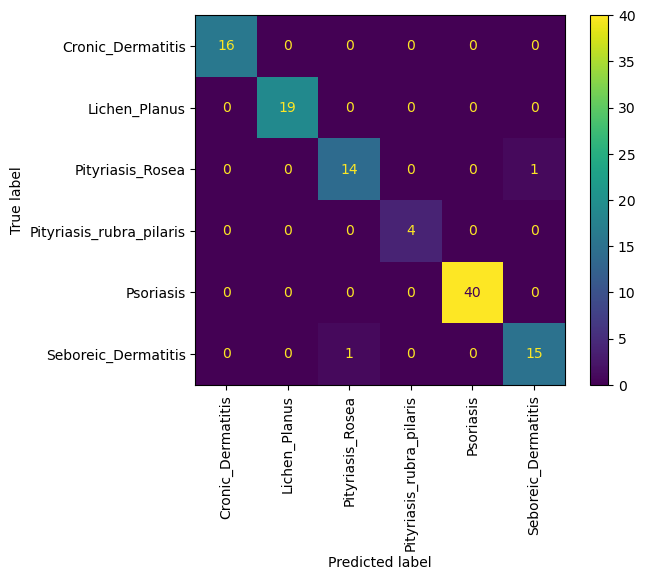

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg, xticks_rotation='vertical')

**HYPERPARAMETER TUNING OF LOGISTIC REGRESSION MODEL**

In [56]:
Log_Reg.get_params() #Parameters of Logistic Regression Model

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
# Defining Parameters' ranges for Tuning
params_Log_Reg = {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.arange(0.01, 1.5, 0.01),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200, 300],
    'class_weight' :['balanced', None],             
    'multi_class' :['auto', 'ovr', 'multinomial']}
from sklearn.model_selection import ParameterGrid
param_size_Log_Reg = ParameterGrid(params_Log_Reg)
len(param_size_Log_Reg)  

40230

In [58]:
Log_Reg_Tuned = LogisticRegression(C = 0.01, class_weight = 'balanced', max_iter = 300, multi_class='multinomial', penalty='none', solver='sag')
Log_Reg_Tuned.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=300,
                   multi_class='multinomial', penalty='none', solver='sag')

In [59]:
y_train_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(X_train) # training model 
y_test_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(X_test) # testing model 

In [60]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score: %f" % accuracy_score(y_train, y_train_pred_Log_Reg_Tuned))
print("Logistic Regression test set score: %f" % accuracy_score(y_test, y_test_pred_Log_Reg_Tuned))

Logistic Regression training set score: 1.000000
Logistic Regression test set score: 0.981818


In [61]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_Log_Reg_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      0.94      0.94        16

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



In [62]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

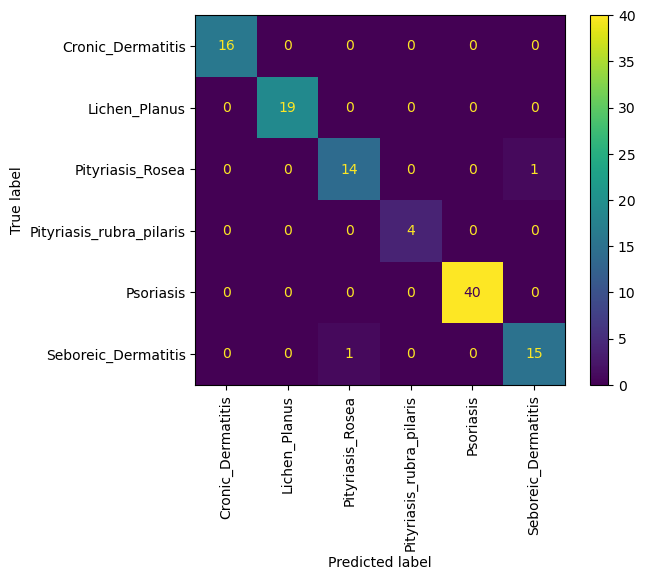

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg_Tuned, xticks_rotation='vertical')

## 2. K- Nearest Neighbors Classifier

In [64]:
KNN_C = KNeighborsClassifier()
KNN_C.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
y_train_pred_KNN_C = KNN_C.predict(X_train)
y_test_pred_KNN_C = KNN_C.predict(X_test)

In [66]:
#Evaluate KNN model:
print("KNN training set score: %f" % accuracy_score(y_train, y_train_pred_KNN_C))
print("KNN test set score: %f" % accuracy_score(y_test, y_test_pred_KNN_C))

KNN training set score: 1.000000
KNN test set score: 0.954545


In [67]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_KNN_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.94      1.00      0.97        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.88      0.93      0.90        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      0.95      0.97        40
pityriasis_rubra_pilaris       0.88      0.88      0.88        16

                accuracy                           0.95       110
               macro avg       0.95      0.96      0.95       110
            weighted avg       0.96      0.95      0.95       110



In [68]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

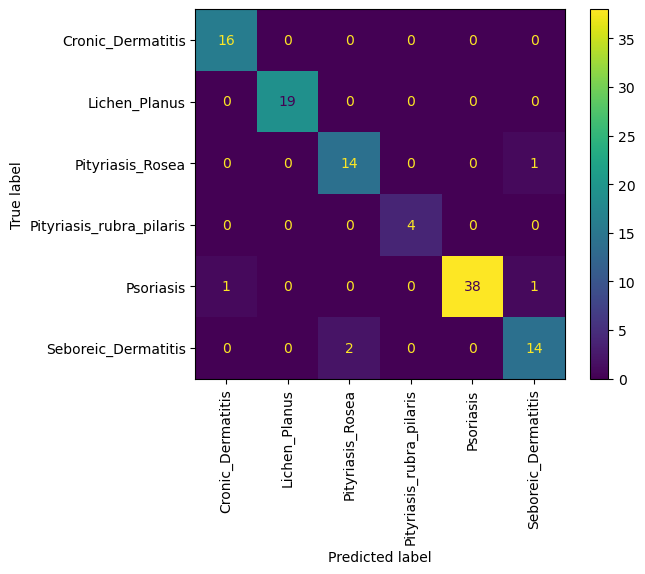

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_KNN_C, xticks_rotation='vertical')

**HYPERPARAMETER TUNING OF KNN CLASSIFIER MODEL**

In [70]:
KNN_C.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [71]:
# Defining Parameters' ranges for Tuning
params_KNN_C = {'n_neighbors':[2,3,4,5,6,7,8,9,10],
         'weights':["uniform", "distance"],
         'metric':['minkowski', 'chebyshev'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [20,30,40,50,60,70,80,90,100],
         'p': [1,2]}

from sklearn.model_selection import ParameterGrid
param_size_KNN_C = ParameterGrid(params_KNN_C)
len(param_size_KNN_C)  

2592

In [72]:
KNN_C_Tuned = KNeighborsClassifier(algorithm='auto', leaf_size= 20, metric= 'minkowski', n_neighbors= 2, p=1, weights= 'distance')
KNN_C_Tuned.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=2, p=1, weights='distance')

In [73]:
y_train_pred_KNN_C_Tuned= KNN_C_Tuned.predict(X_train) # training model 
y_test_pred_KNN_C_Tuned = KNN_C_Tuned.predict(X_test) # testing model 

In [74]:
#Evaluate Logistic Regression model:
print("KNN Tuned training set score: %f" % accuracy_score(y_train, y_train_pred_KNN_C_Tuned))
print("KNN Tuned test set score: %f" % accuracy_score(y_test, y_test_pred_KNN_C_Tuned))

KNN Tuned training set score: 1.000000
KNN Tuned test set score: 0.963636


In [75]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_KNN_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.88      0.93      0.90        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      0.97      0.99        40
pityriasis_rubra_pilaris       0.88      0.88      0.88        16

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.96      0.96      0.96       110



In [76]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

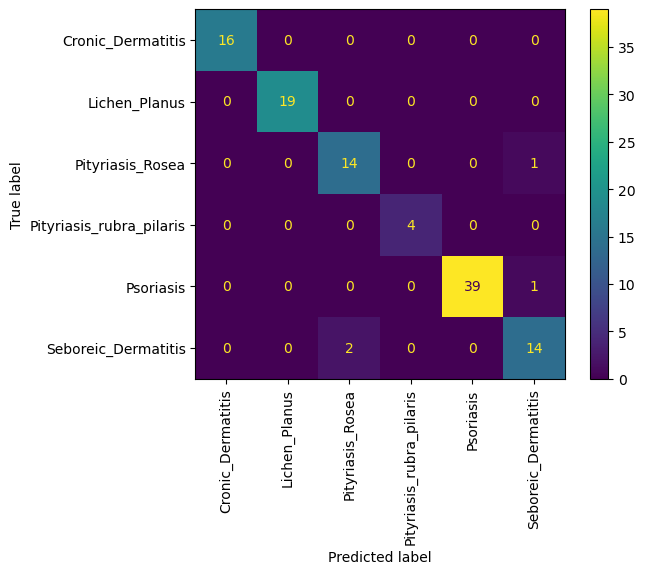

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_KNN_C_Tuned, xticks_rotation='vertical')

## 3. Support Vector Classifier

In [78]:
SVC = SVC(class_weight='balanced')
SVC.fit(X_train, y_train)

SVC(class_weight='balanced')

In [79]:
y_train_pred_SVC=SVC.predict(X_train)
y_test_pred_SVC=SVC.predict(X_test)

In [80]:
#Evaluate SVC model:
print("SVC training set score: %f" % accuracy_score(y_train, y_train_pred_SVC))
print("SVC test set score: %f" % accuracy_score(y_test, y_test_pred_SVC))

SVC training set score: 1.000000
SVC test set score: 0.990909


In [81]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_SVC, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       1.00      0.93      0.97        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      1.00      0.97        16

                accuracy                           0.99       110
               macro avg       0.99      0.99      0.99       110
            weighted avg       0.99      0.99      0.99       110



In [82]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

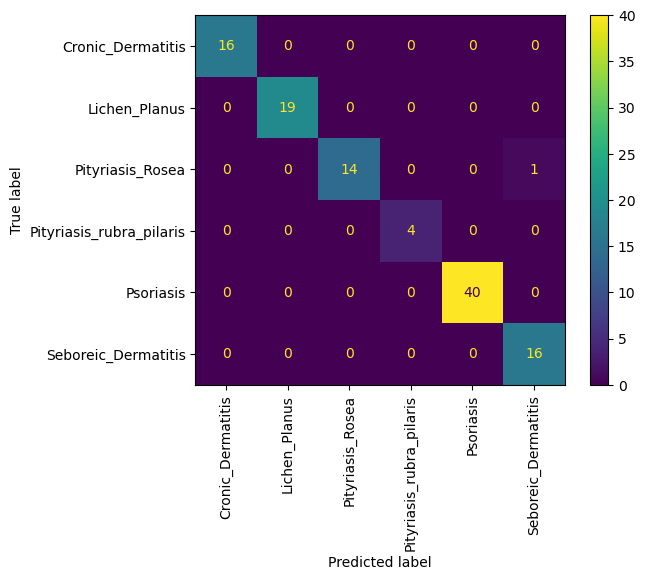

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_SVC, xticks_rotation='vertical')

## 4. Decision Tree Classifier

In [84]:
DT_C = DecisionTreeClassifier()

In [85]:
DT_C.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_train_pred_DT_C = DT_C.predict(X_train)
y_test_pred_DT_C = DT_C.predict(X_test)

In [87]:
#Evaluate DT model:

print("DT training set score: %f" % accuracy_score(y_train, y_train_pred_DT_C))
print("DT test set score: %f" % accuracy_score(y_test, y_test_pred_DT_C))

DT training set score: 1.000000
DT test set score: 0.963636


In [88]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_DT_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       0.95      1.00      0.97        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      0.95      0.97        40
pityriasis_rubra_pilaris       0.88      0.94      0.91        16

                accuracy                           0.96       110
               macro avg       0.96      0.97      0.97       110
            weighted avg       0.97      0.96      0.96       110



In [89]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

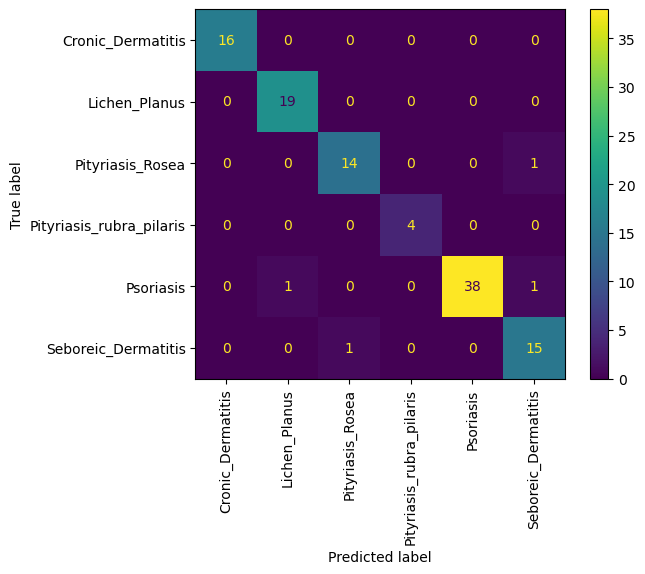

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DT_C, xticks_rotation='vertical')

**HYPERPARAMETER TUNING OF DECISION TREE CLASSIFIER MODEL**

In [91]:
DT_C.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [92]:
# Defining Parameters' ranges for Tuning
params_DT_C = {'max_depth':[1, 2 , 4, 6, 8, 10],
               'max_features': ['auto','sqrt', 'log2', None],
               'min_samples_leaf':[1,2, 4, 6, 8, 10, None],
               'min_samples_split':[1,2, 4, 6, 8, 10,None],
               'criterion':['gini','entropy', 'log_loss'],
               'splitter': ['best', 'random'],
               'max_leaf_nodes': [1, 3, 5, 10, 15, 20, 25, None],
               'random_state': [42]
              }
from sklearn.model_selection import ParameterGrid
param_size_DT_C = ParameterGrid(params_DT_C)
len(param_size_DT_C)  

56448

criterion='entropy', max_depth= 7, max_leaf_nodes= 15, min_samples_leaf= 1, min_samples_split= 6, splitter='random')

In [93]:
DT_C_Tuned = DecisionTreeClassifier(criterion='gini', max_depth= 8, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 4, max_features= None, random_state= 42, splitter='random')
DT_C_Tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=42,
                       splitter='random')

In [94]:
y_train_pred_DT_C_Tuned = DT_C_Tuned.predict(X_train) # training model 
y_test_pred_DT_C_Tuned = DT_C_Tuned.predict(X_test) # testing model 

In [95]:
#Evaluate Logistic Regression model:
print("Tuned DT Classifier  training set score: %f" % accuracy_score(y_train, y_train_pred_DT_C_Tuned))
print("Tuned DT Classifier testing set score: %f" % accuracy_score(y_test, y_test_pred_DT_C_Tuned))

Tuned DT Classifier  training set score: 0.997543
Tuned DT Classifier testing set score: 0.963636


In [96]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_DT_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      0.75      0.86         4
       cronic_dermatitis       1.00      0.97      0.99        40
pityriasis_rubra_pilaris       0.83      0.94      0.88        16

                accuracy                           0.96       110
               macro avg       0.96      0.93      0.94       110
            weighted avg       0.97      0.96      0.96       110



In [97]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

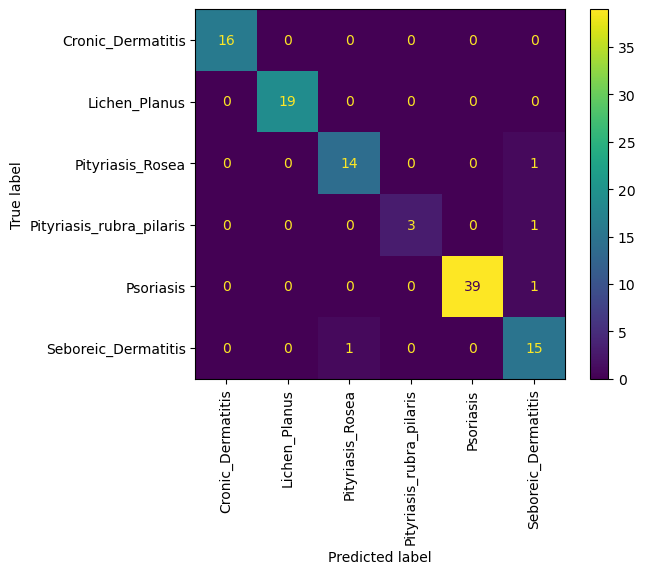

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DT_C_Tuned, xticks_rotation='vertical')

## 5. Random Forest Classifier

In [99]:
RF_C = RandomForestClassifier(random_state=42)

In [100]:
RF_C.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_train_pred_RF_C=RF_C.predict(X_train)
y_test_pred_RF_C=RF_C.predict(X_test)

In [102]:
#Evaluate DT model:

print("RF Classifier training set score: %f" % accuracy_score(y_train,y_train_pred_RF_C))
print("RF Classifier test set score: %f" % accuracy_score(y_test, y_test_pred_RF_C))

RF Classifier training set score: 1.000000
RF Classifier test set score: 0.963636


In [103]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_RF_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.92      0.80      0.86        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.83      0.94      0.88        16

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



In [104]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

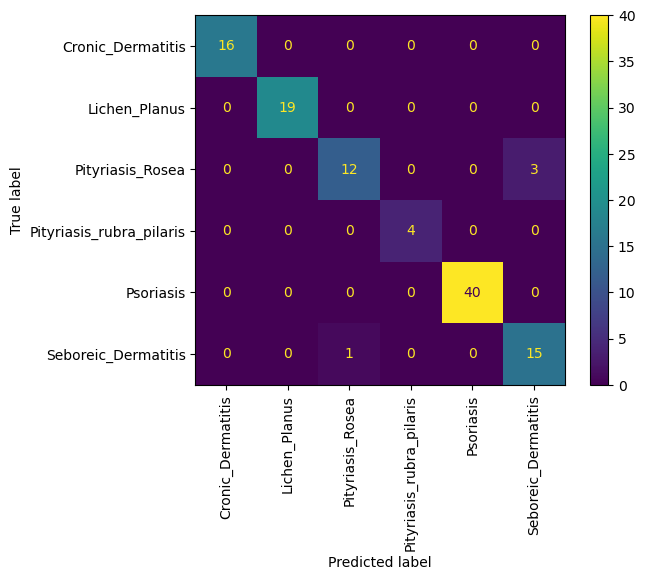

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_RF_C, xticks_rotation='vertical')

**HYPERPARAMETER TUNING OF RANDOM FOREST CLASSIFIER MODEL**

In [106]:
RF_C.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [107]:
# Defining Parameters' ranges for Tuning
params_RFC = {'n_estimators': [10,30,50,70, 80, 90, 100],
            'max_depth':[1, 2 , 4, 6, 8, 10, None],
            'min_samples_leaf':[1, 2 , 4, 6, 8, 10, None],
            'min_samples_split':[1, 2 , 4, 6, 8, 10, None],
            'criterion':['gini','entropy', 'log_loss'],
            'max_features':['sqrt','log2', None],
            'bootstrap':[True, False], 
            'random_state': [42]
}

from sklearn.model_selection import ParameterGrid
param_size_RFC = ParameterGrid(params_RFC)
len(param_size_RFC)  

43218

In [108]:
RFC_Tuned = RandomForestClassifier(bootstrap= True, criterion='gini', max_depth= 6, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state= 42)
RFC_Tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', random_state=42)

In [109]:
y_train_pred_RFC_Tuned = RFC_Tuned.predict(X_train) # training model 
y_test_pred_RFC_Tuned = RFC_Tuned.predict(X_test) # testing model 

In [110]:
#Evaluate Logistic Regression model:y_train_pred_RFC_Tuned
print("Tuned Random Forest Classifier training set score: %f" % accuracy_score(y_train, y_train_pred_RFC_Tuned))
print("Tuned Random Forest Classifier testing set score: %f" % accuracy_score(y_test, y_test_pred_RFC_Tuned))

Tuned Random Forest Classifier training set score: 0.997543
Tuned Random Forest Classifier testing set score: 0.963636


In [111]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_RFC_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.92      0.80      0.86        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.83      0.94      0.88        16

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



In [112]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

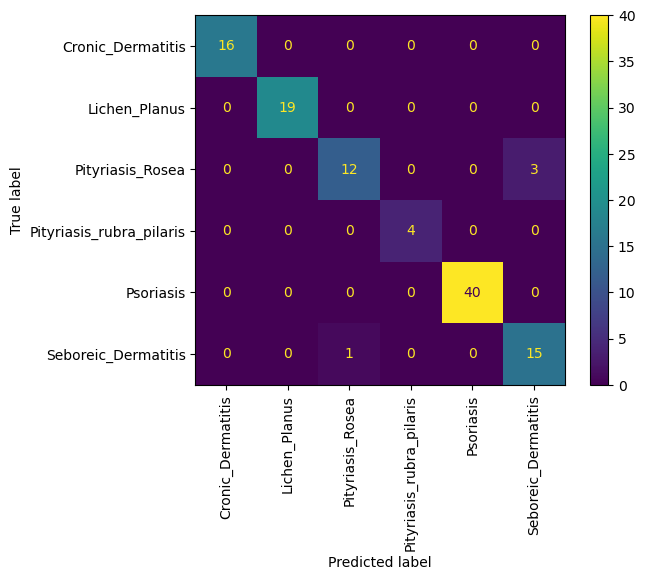

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_RFC_Tuned, xticks_rotation='vertical')

## 6. Multinomial Naive Bayes Classifier

In [114]:
MNB_C = MultinomialNB()
MNB_C.fit(X_train, y_train)

MultinomialNB()

In [115]:
y_train_pred_MNB_C = MNB_C.predict(X_train) # training model 
y_test_pred_MNB_C = MNB_C.predict(X_test)

In [116]:
#Evaluate Logistic Regression model:
print("Multinomial Naive Bayes training set score: %f" % accuracy_score(y_train, y_train_pred_MNB_C))
print("Multinomial Naive Bayes test set score: %f" % accuracy_score(y_test, y_test_pred_MNB_C))

Multinomial Naive Bayes training set score: 0.987715
Multinomial Naive Bayes test set score: 0.990909


In [117]:
MNB_C.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [118]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_MNB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.94      1.00      0.97        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       1.00      0.94      0.97        16

                accuracy                           0.99       110
               macro avg       0.99      0.99      0.99       110
            weighted avg       0.99      0.99      0.99       110



In [119]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

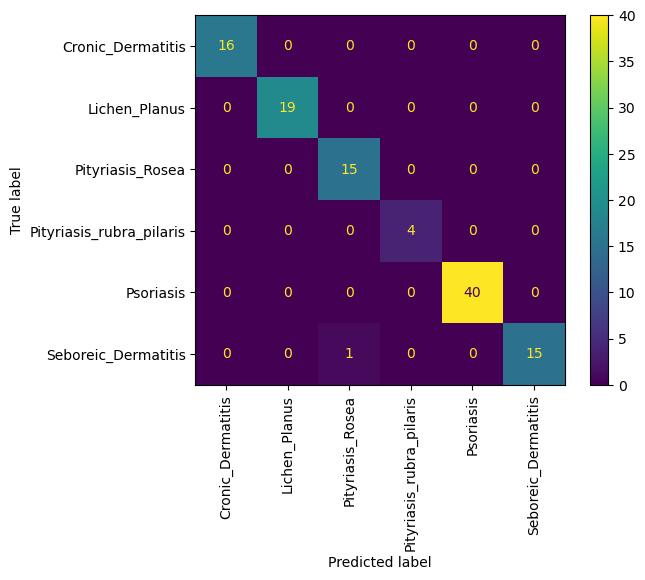

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_MNB_C, xticks_rotation='vertical')

## 7. Gradient Boost Classifiers

In [121]:
GB_C = GradientBoostingClassifier(random_state=42)

In [122]:
GB_C.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [123]:
y_train_pred_GB_C = GB_C.predict(X_train)
y_test_pred_GB_C= GB_C.predict(X_test)

In [124]:
#Evaluate DT model:

print("GB_C training set score: %f" % accuracy_score(y_train,y_train_pred_GB_C))
print("GB_C test set score: %f" % accuracy_score(y_test, y_test_pred_GB_C))

GB_C training set score: 1.000000
GB_C test set score: 0.954545


In [125]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_GB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.87      0.90        15
        pityriasis_rosea       1.00      0.75      0.86         4
       cronic_dermatitis       0.97      0.97      0.97        40
pityriasis_rubra_pilaris       0.83      0.94      0.88        16

                accuracy                           0.95       110
               macro avg       0.96      0.92      0.94       110
            weighted avg       0.96      0.95      0.95       110



In [126]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

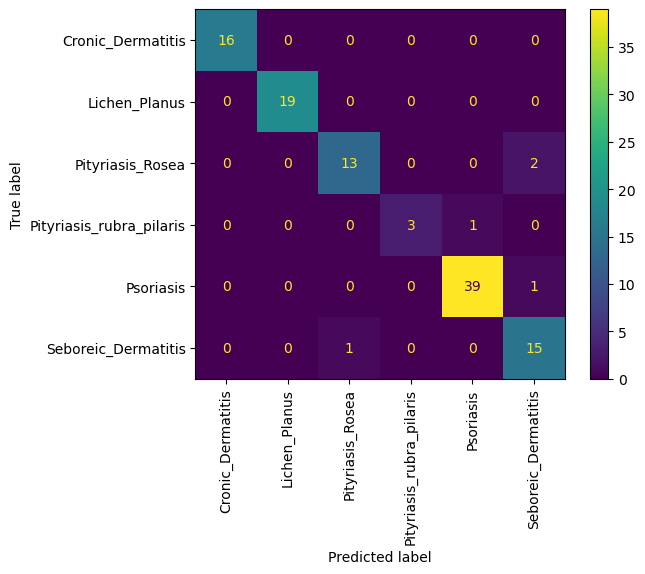

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GB_C, xticks_rotation='vertical')

**HYPERPARAMETER TUNING OF GRADIENT BOOST CLASSIFIER MODEL**

In [128]:
GB_C.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [129]:
# Defining Parameters' ranges for Tuning
params_GBC = {'loss':['log_loss', 'deviance', 'exponential'],
              'learning_rate':[0.01,0.05, 0.08, 0.1, 0.12, 0.15,0.20,0.25,0.30],
              'criterion':['fridman_mse', 'squared_error'],
              'max_features':['auto', 'sqrt','log2', None],
              'random_state': [35, 42]
}

from sklearn.model_selection import ParameterGrid
param_size_GBC = ParameterGrid(params_GBC)
len(param_size_GBC)  

432

In [130]:
GB_C_Tuned = GradientBoostingClassifier(criterion= 'squared_error', learning_rate= 0.01, loss='deviance', max_features='sqrt', random_state = 42)
GB_C_Tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_features='sqrt', random_state=42)

In [131]:
y_train_pred_GB_C_Tuned = GB_C_Tuned.predict(X_train) # training model 
y_test_pred_GB_C_Tuned = GB_C_Tuned.predict(X_test)

In [132]:
#Evaluate Logistic Regression model:
print("GB Tuned Classifier training set score: %f" % accuracy_score(y_train, y_train_pred_GB_C_Tuned))
print("GB Tuned Classifier test set score: %f" % accuracy_score(y_test, y_test_pred_GB_C_Tuned))

GB Tuned Classifier training set score: 1.000000
GB Tuned Classifier test set score: 0.981818


In [133]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_GB_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      0.94      0.94        16

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



In [134]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

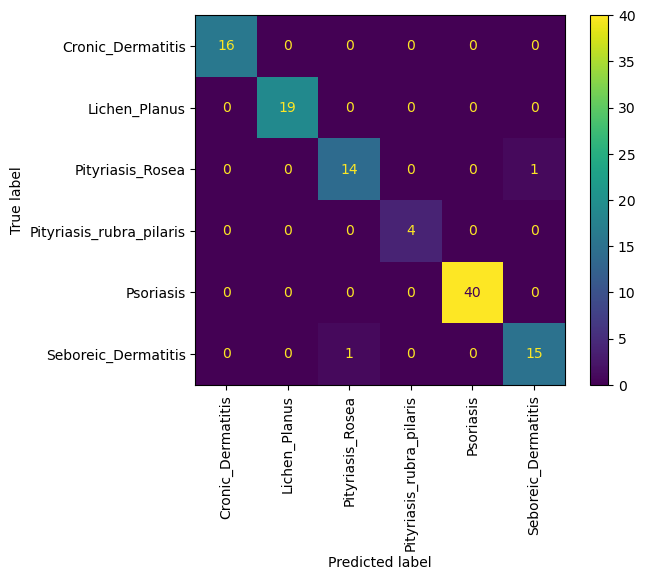

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GB_C_Tuned, xticks_rotation='vertical')

## 8. Artificial Neural Networks Classifier

In [136]:
X_train.shape,  y_train.shape

((407, 35), (407,))

In [137]:
# model creation 
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron 
ANN_C = MLPClassifier()
ANN_C.fit(X_train,y_train)

MLPClassifier()

In [138]:
y_train_pred_ANN_C= ANN_C.predict(X_train)
y_test_pred_ANN_C= ANN_C.predict(X_test)

In [139]:
# Evaluate XGB model:

print("ANN training set score: %f" % accuracy_score(y_train, y_train_pred_ANN_C))
print("ANN test set score: %f" % accuracy_score(y_test, y_test_pred_ANN_C))

ANN training set score: 1.000000
ANN test set score: 0.972727


In [140]:
# Classification Report of Tuned Logistic Regrey_test_pred_ANN_Cssion Model
print(classification_report(y_test, y_test_pred_ANN_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.87      0.90        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.88      0.94      0.91        16

                accuracy                           0.97       110
               macro avg       0.97      0.97      0.97       110
            weighted avg       0.97      0.97      0.97       110



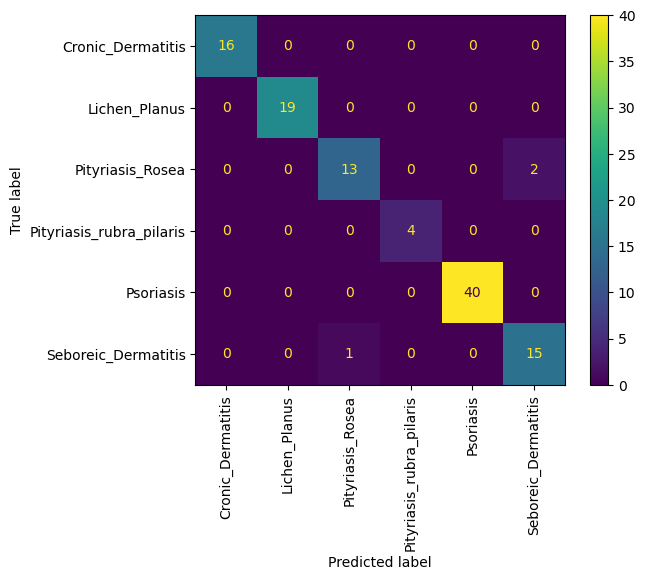

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ANN_C, xticks_rotation='vertical',  display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

**HYPERPARAMETER TUNING OF ANN CLASSIFIER MODEL**

In [142]:
ANN_C.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [143]:
# Defining Parameters' ranges for Tuning
params_ANN = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']
             }
from sklearn.model_selection import ParameterGrid
param_size_ANN = ParameterGrid(params_ANN)
len(param_size_ANN)  

48

In [144]:
ANN_C_Tuned = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes =(100,), learning_rate='adaptive', solver='adam')
ANN_C_Tuned.fit(X_train,y_train)

MLPClassifier(activation='tanh', learning_rate='adaptive')

In [145]:
y_train_pred_ANN_C_Tuned= ANN_C_Tuned.predict(X_train)
y_test_pred_ANN_C_Tuned= ANN_C_Tuned.predict(X_test)

In [146]:
# Evaluate XGB model:

print("ANN_Tuned training set score: %f" % accuracy_score(y_train, y_train_pred_ANN_C_Tuned))
print("ANN_Tuned test set score: %f" % accuracy_score(y_test, y_test_pred_ANN_C_Tuned))

ANN_Tuned training set score: 1.000000
ANN_Tuned test set score: 0.981818


In [147]:
# Classification Report of Tuned Logistic Regrey_test_pred_ANN_Cssion Model
print(classification_report(y_test, y_test_pred_ANN_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      0.94      0.94        16

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



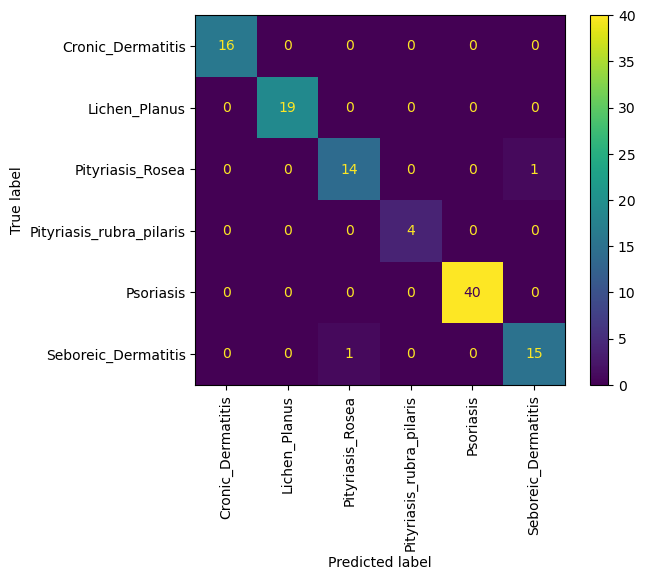

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ANN_C_Tuned, xticks_rotation='vertical',  display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

## 9. XG Boost Classifier

In [149]:
XGB_C = XGBClassifier()

In [150]:
y

0      Seboreic_Dermatitis
1                Psoriasis
2            Lichen_Planus
3                Psoriasis
4            Lichen_Planus
              ...         
361       Pityriasis_Rosea
362       Pityriasis_Rosea
363          Lichen_Planus
364          Lichen_Planus
365              Psoriasis
Name: class, Length: 366, dtype: object

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_labeled = le.fit_transform(y_train)
y_test_labeled = le.fit_transform(y_test)

In [152]:
X_train.shape,  y_train_labeled.shape

((407, 35), (407,))

In [153]:
y_train_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [154]:
list(le.inverse_transform([0, 1,2,3,4,5]))

['Cronic_Dermatitis',
 'Lichen_Planus',
 'Pityriasis_Rosea',
 'Pityriasis_rubra_pilaris',
 'Psoriasis',
 'Seboreic_Dermatitis']

In [155]:
XGB_C.fit(X_train, y_train_labeled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [156]:
y_train_pred_XGB_C =XGB_C.predict(X_train)
y_test_pred_XGB_C=XGB_C.predict(X_test)

In [157]:
#Evaluate DT model:
print("XGB_C training set score: %f" % accuracy_score(y_train_labeled,y_train_pred_XGB_C))
print("XGB_C test set score: %f" % accuracy_score(y_test_labeled, y_test_pred_XGB_C))

XGB_C training set score: 1.000000
XGB_C test set score: 0.936364


In [158]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test_labeled, y_test_pred_XGB_C, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       0.90      1.00      0.95        19
           lichen_planus       0.92      0.80      0.86        15
        pityriasis_rosea       1.00      0.75      0.86         4
       cronic_dermatitis       0.97      0.95      0.96        40
pityriasis_rubra_pilaris       0.83      0.94      0.88        16

                accuracy                           0.94       110
               macro avg       0.94      0.91      0.92       110
            weighted avg       0.94      0.94      0.94       110



In [159]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

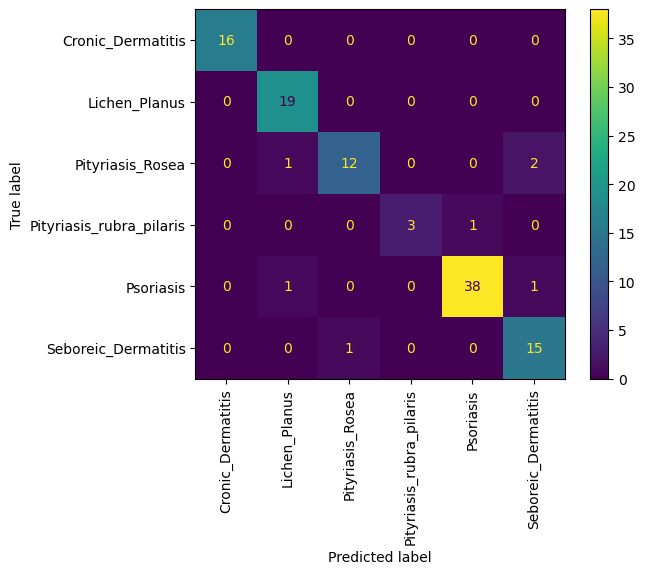

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_labeled, y_test_pred_XGB_C, xticks_rotation='vertical', display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

**HYPERPARAMETER TUNING OF XGB CLASSIFIER MODEL**

In [161]:
XGB_C.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [162]:
# Defining Parameters' ranges for Tuning
params_XGB_C = {
    "max_depth": [3, 4, 5, 7, 9, 11, 13, 15, None],
    "learning_rate": [0.3, 0.1, 0.01, 0.03, 0.05, None],
    "gamma": [0, 0.25, 1, None],
    "reg_lambda": [0, 1, 10, None],
    "subsample": [0.4, 0.8, None],
    "colsample_bytree": [0.5, 0.7, 0.9, None],
}
from sklearn.model_selection import ParameterGrid
param_size_XGB_C = ParameterGrid(params_XGB_C)
len(param_size_XGB_C)  

10368

In [163]:
XGB_C_Tuned = XGBClassifier(colsample_bytree=0.5, gamma= 1, learning_rate= 0.01, max_depth= 4, reg_lambda= 0, subsample= 0.4)
XGB_C_Tuned.fit(X_train,  y_train_labeled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [164]:
y_train_pred_XGB_C_Tuned = XGB_C_Tuned.predict(X_train) # training model 
y_test_pred_XGB_C_Tuned = XGB_C_Tuned.predict(X_test)

In [165]:
#Evaluate Logistic Regression model:
print("XGB Tuned Classifier training set score: %f" % accuracy_score(y_train_labeled, y_train_pred_XGB_C_Tuned))
print("XGB Tuned Classifier test set score: %f" % accuracy_score(y_test_labeled, y_test_pred_XGB_C_Tuned))

XGB Tuned Classifier training set score: 1.000000
XGB Tuned Classifier test set score: 0.981818


In [166]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test_labeled, y_test_pred_XGB_C_Tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        16
     seboreic_dermatitis       1.00      1.00      1.00        19
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       1.00      1.00      1.00         4
       cronic_dermatitis       1.00      1.00      1.00        40
pityriasis_rubra_pilaris       0.94      0.94      0.94        16

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



In [167]:
y_test.value_counts()

Psoriasis                   40
Lichen_Planus               19
Seboreic_Dermatitis         16
Cronic_Dermatitis           16
Pityriasis_Rosea            15
Pityriasis_rubra_pilaris     4
Name: class, dtype: int64

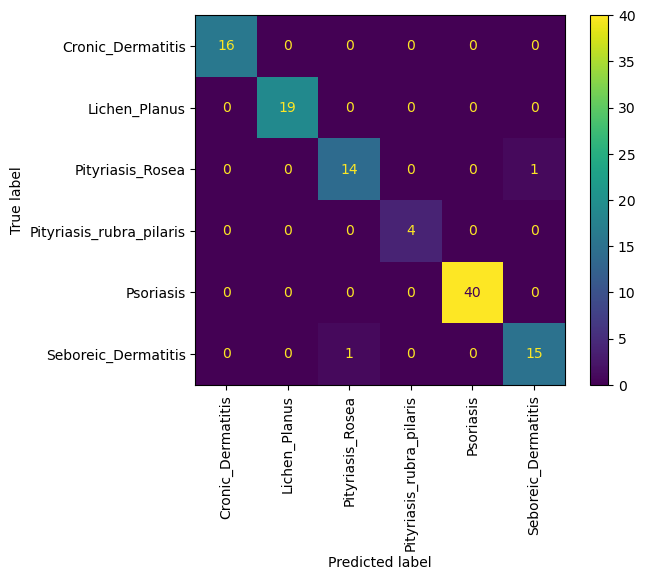

In [168]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_labeled, y_test_pred_XGB_C_Tuned, xticks_rotation='vertical',  display_labels=['Cronic_Dermatitis', 'Lichen_Planus', 'Pityriasis_Rosea', 'Pityriasis_rubra_pilaris', 'Psoriasis', 'Seboreic_Dermatitis'])

# MODEL COMPARISONS

In [169]:
Model_Comparison= pd.DataFrame({'Model':['Logistic Regressor (Tuned)', 
                                         'KNN Classifier (Tuned)', 
                                         'Support Vector Classifier ', 
                                         'Decision Tree Classifier(Tuned)', 
                                         'Random Forest Classifier(Tuned)', 
                                         'Multinomial Naive Bayes Classifier',
                                         'Gradient Boosting Classifier(Tuned)',
                                         'ANN Classifier(Tuned)',
                                         'XG Boosting Classifier(Tuned)'],
                                'Train Score':[accuracy_score(y_train, y_train_pred_Log_Reg_Tuned), 
                                               accuracy_score(y_train, y_train_pred_KNN_C_Tuned), 
                                               accuracy_score(y_train, y_train_pred_SVC),
                                               accuracy_score(y_train, y_train_pred_DT_C_Tuned), 
                                               accuracy_score(y_train, y_train_pred_RFC_Tuned), 
                                               accuracy_score(y_train, y_train_pred_MNB_C),
                                               accuracy_score(y_train,y_train_pred_GB_C_Tuned),
                                               accuracy_score(y_train, y_train_pred_ANN_C_Tuned),
                                               accuracy_score(y_train_labeled,y_train_pred_XGB_C_Tuned)],
                                'Test Score':[accuracy_score(y_test, y_test_pred_Log_Reg_Tuned), 
                                              accuracy_score(y_test, y_test_pred_KNN_C_Tuned), 
                                              accuracy_score(y_test, y_test_pred_SVC),
                                              accuracy_score(y_test, y_test_pred_DT_C_Tuned), 
                                              accuracy_score(y_test, y_test_pred_RFC_Tuned),
                                              accuracy_score(y_test, y_test_pred_MNB_C),
                                              accuracy_score(y_test, y_test_pred_GB_C_Tuned),
                                              accuracy_score(y_test, y_test_pred_ANN_C_Tuned),
                                              accuracy_score(y_test_labeled, y_test_pred_XGB_C_Tuned)]})
Model_Comparison.index+=1
Model_Comparison

Model  Train Score  Test Score
1           Logistic Regressor (Tuned)     1.000000    0.981818
2               KNN Classifier (Tuned)     1.000000    0.963636
3           Support Vector Classifier      1.000000    0.990909
4      Decision Tree Classifier(Tuned)     0.997543    0.963636
5      Random Forest Classifier(Tuned)     0.997543    0.963636
6   Multinomial Naive Bayes Classifier     0.987715    0.990909
7  Gradient Boosting Classifier(Tuned)     1.000000    0.981818
8                ANN Classifier(Tuned)     1.000000    0.981818
9        XG Boosting Classifier(Tuned)     1.000000    0.981818

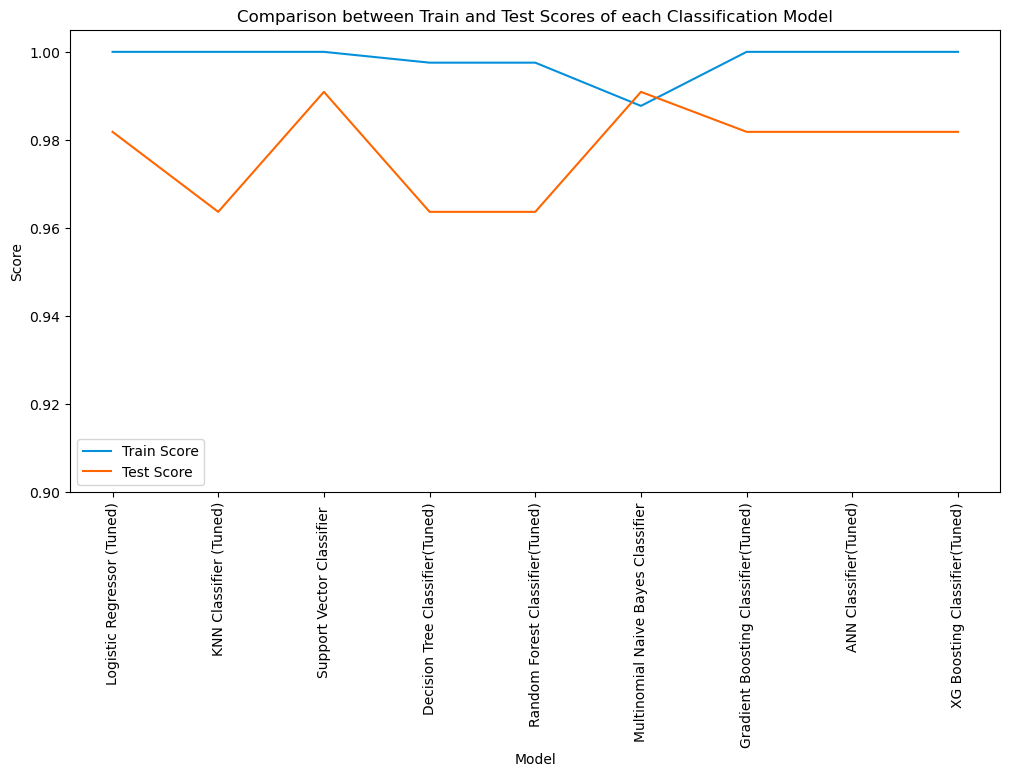

In [170]:
import matplotlib.pyplot as plt

# Get the data from the dataframe
model_names = Model_Comparison['Model'].tolist()
train_scores = Model_Comparison['Train Score'].tolist()
test_scores = Model_Comparison['Test Score'].tolist()
plt.figure(figsize=(12,6))
# Plot the data
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.900, 1.005)
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.show()

In [171]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Train Score', x= Model_Comparison['Model'], y= Model_Comparison['Train Score'],  text= Model_Comparison['Train Score'], texttemplate='%{text:.3}', textposition='outside', marker_color='#0590DA'),
    go.Bar(name='Test Score', x= Model_Comparison['Model'], y=Model_Comparison['Test Score'], text= Model_Comparison['Test Score'], texttemplate='%{text:.3}', textposition='outside', marker_color='#FF6600')
])
# Change the bar mode
fig.update_layout(barmode='group', width=1000, height=600, margin=dict(l=50, r=50, b=50, t=60, pad=16))
fig.show()

## SUMMARY
The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

The Primary objective is to build a machine learning techniques, which can effectively differentiate skin disease classification.

**METHODOLOGY FOLLOWED**


> The dataset contains  12 clinical features and 22 histopathological features, the feature family history has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

> Exploratory data analysis has been carried out on each features and their relationship with other features.

> The age feature had NAN values and zero values which was handled using the median of the age feature.

> Correlation of the features has been captured using heatmap.

**INSIGHTS FROM EDA:**

> The distribution of 12 clinical features and 22 histopathological features in the dataset with 366 instances is depicted using histogram and KDE plot.

> Dieseases like Lichen_Planus, Cronic_Dermatitis,and Pityriasis_Rosea does not show any relation of tranfer within family members. Also, theses diseases can occurs in early ages till the age of 70 years is also as seen from the distribution.

> Diseases like Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family and disease Seboreic_Dermatitis too shows a some relation of transfer within family members.

> Disease like Pityriasis_rubra_pilaris shows its presence in early ages and till the age of 15 to 20 years only.

> Diseases like Psoriasis and Seboreic_Dermatitis shows its presence in early ages and till the age of 70 years.

> The Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using combination of SMOTE and edited nearest neighbor technique.

> Heatmap is used to find the correlation between the features too.
 

**INSIGHTS FROM CLASSIFICATION MODELS:**

***Model-1: Logistic Classifier***
> For the tuned Logistic classifer model, the  accuracy score for test and train data were 0.981 and 1 respectively.

***Model-2: KNN Classifier***
> For the tuned KNN classifer model, the  accuracy score for test and train data were 0.964 and 1 respectively. 

***Model-3: Support Vector Classifier***
> For Support Vector classifer model, the  accuracy score for test and train data were 0.99 and 1 respectively.

***Model-4: Desicion Tree Classifier***
> For Desicion Tree classifer model, the  accuracy score for test and train data were 0.964 and 0.998 respectively. 

***Model-5: Random Forest Classifier***
> For Random Forest classifer model, the  accuracy score for test and train data were 0.964 and 0.998 respectively.

***Model-6: Multinomial Naive Bayes Classifier***
> For Random Forest classifer model, the  accuracy score for test and train data were 0.991 and 0.988 respectively.

***Model-7: Gradient Boost Classifier***
> For Gradient Boost classifer model, the  accuracy score for test and train data were 0.982 and 1 respectively.

***Model-8: Artificial Neural Networks Classifier***
> For ANN Classifier, the accuracy score for the test and train dataset were 0.982 and 1 respectively.

***Model-9: XGB Classifier***
> For XGB classifer model, the  accuracy score for test and train data were 0.982 and 1 respectively.


**CONCLUSION:**

Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

From EDA, skin diseases Psoriasis and Pityriasis_rubra_pilaris shows strong relation of transfer from family members and disease Seboreic_Dermatitis too shows a some relation of transfer within family members. Skin disease like Pityriasis_rubra_pilaris shows its presence in early ages till the age of 15 to 20 years only. Skin diseases Psoriasis and Seboreic_Dermatitis shows its presence in early ages till the age of 70 years. 

Also Disease / target class count plot showed imbalanced values between diffrent classes which was balanced using a combination of SMOTE and edited nearest neighbor technique.

The 9 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.

The Multinominal Naive Bayes classifier Model has given a better accuracy Score and F1 Score compared to other classifier models and hence recommend to use Multinominal Naive Bayes classifier Model in order for the doctors to identify the skin diseases of the patient at the earliest.
 

**CHALLENGES FACED:** 

> The age feature had NAN and zero values which were replaced using the median of the age feature.

> The SMOTE technique was used to balance the target class.

> Various classifier models were studied and evaluated using accuracy score, classification report and confusion matrix.

> The model with highest accuracy score and F1 Score was obtained in Multinominal Naive Bayes classifier and hence will be the deciding factor.
